In [1]:
from qwak.qwak import QWAK
from utils.plotTools import plot_qwak

import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
import sympy as simp
import math
import copy
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

from scipy.ndimage import gaussian_filter

In [2]:
def load_pst(filename):
    # Check if the file exists
    if os.path.exists(filename):
        # If the file exists, load the data from the file
        with open(filename, 'r') as file:
            pst_data = json.load(file)
        print(f'{filename} exists!')
    else:
        # If the file does not exist, generate the data
        print(f'{filename} doesnt exist!')
        pst_data = []
    # Return the data
    return pst_data

def pst_found_only(input_dict):
    # Create a new dictionary by filtering out key-value pairs where the value is equal to '-1'
    # Note: assuming the values in the dictionary are stored as strings, as in the previous examples
    filtered_dict = {key: value for key, value in input_dict.items() if value != '-1'}
    if not filtered_dict:
        return ['PST not found for this structure!']
    
    # Return the filtered dictionary
    return filtered_dict

In [3]:
pst_file_p3 = f'Datasets/PerfectStateTransfer/pstSimple_Path_N3.txt'
pst_file_c4 = f'Datasets/PerfectStateTransfer/pstSimple_Cycle_N4.txt'
pst_file_c6 = f'Datasets/PerfectStateTransfer/pstSimple_Cycle_N6.txt'
pst_file_h8 = f'Datasets/PerfectStateTransfer/pstSimple_Hypercube_N8.txt'
pst_file_h16 = f'Datasets/PerfectStateTransfer/pstSimple_Hypercube_N16.txt'

pst_file_p2p2 = f'Datasets/PerfectStateTransfer/pstCartesian_Path_N4.txt'
pst_filec_c2c4 = f'Datasets/PerfectStateTransfer/pstCartesian_Cycle_N8.txt'
pst_file_c4c4 = f'Datasets/PerfectStateTransfer/pstCartesian_Cycle_N16.txt'
pst_file_c4p2 = f'Datasets/PerfectStateTransfer/pstCartesian_CyclePath_N8.txt'

In [4]:
pst_p3 = load_pst(pst_file_p3)
pst_c4 = load_pst(pst_file_c4)
pst_c6 = load_pst(pst_file_c6)
pst_h8 = load_pst(pst_file_h8)
pst_h16 = load_pst(pst_file_h16)

pst_p2p2 = load_pst(pst_file_p2p2)
pst_c2c4 = load_pst(pst_filec_c2c4)
pst_c4c4 = load_pst(pst_file_c4c4)
pst_c4p2 = load_pst(pst_file_c4p2)

Datasets/PerfectStateTransfer/pstSimple_Path_N3.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Cycle_N4.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Cycle_N6.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Hypercube_N8.txt exists!
Datasets/PerfectStateTransfer/pstSimple_Hypercube_N16.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Path_N4.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Cycle_N8.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_Cycle_N16.txt exists!
Datasets/PerfectStateTransfer/pstCartesian_CyclePath_N8.txt exists!


In [5]:
pst_only_p3 = pst_found_only(pst_p3)
pst_only_c4 = pst_found_only(pst_c4)
pst_only_c6 = pst_found_only(pst_c6)
pst_only_h8 = pst_found_only(pst_h8)
pst_only_h16 = pst_found_only(pst_h16)

pst_only_p2p2 = pst_found_only(pst_p2p2)
pst_only_c2c4 = pst_found_only(pst_c2c4)
pst_only_c4c4 = pst_found_only(pst_c4c4)
pst_only_c4p2 = pst_found_only(pst_c4p2)

print(f'Path3 ----> {pst_only_p3}\n')
print(f'Cycle4 ----> {pst_only_c4}\n')
print(f'Cycle6 ----> {pst_only_c6}\n')
print(f'Hypercube8 ----> {pst_only_h8}\n')
print(f'Hypercube16 ----> {pst_only_h16}\n')

print(f'CartP2 ----> {pst_only_p2p2}\n')
print(f'CartC2C4 ----> {pst_only_c2c4}\n')
print(f'CartC4C4 ----> {pst_only_c4c4}\n')
print(f'CartC4P2 ----> {pst_only_c4p2}')

Path3 ----> {'(0, 2)': '0.707108562377582*pi'}

Cycle4 ----> {'(0, 2)': '0.5*pi', '(1, 3)': '0.5*pi'}

Cycle6 ----> {'(0, 3)': '1.0*pi', '(1, 4)': '1.0*pi', '(2, 5)': '1.0*pi'}

Hypercube8 ----> {'(0, 7)': '0.5*pi', '(1, 6)': '0.5*pi', '(2, 5)': '0.5*pi', '(3, 4)': '0.5*pi'}

Hypercube16 ----> {'(0, 15)': '0.5*pi', '(1, 14)': '0.5*pi', '(2, 13)': '0.5*pi', '(3, 12)': '0.5*pi', '(4, 11)': '0.5*pi', '(5, 10)': '0.5*pi', '(6, 9)': '0.5*pi', '(7, 8)': '0.5*pi'}

CartP2 ----> {'(0, 3)': '0.5*pi', '(1, 2)': '0.5*pi'}

CartC2C4 ----> {'(0, 6)': '0.5*pi', '(1, 7)': '0.5*pi', '(2, 4)': '0.5*pi', '(3, 5)': '0.5*pi'}

CartC4C4 ----> {'(0, 10)': '0.5*pi', '(1, 11)': '0.5*pi', '(2, 8)': '0.5*pi', '(3, 9)': '0.5*pi', '(4, 14)': '0.5*pi', '(5, 15)': '0.5*pi', '(6, 12)': '0.5*pi', '(7, 13)': '0.5*pi'}

CartC4P2 ----> {'(0, 5)': '0.5*pi', '(1, 4)': '0.5*pi', '(2, 7)': '0.5*pi', '(3, 6)': '0.5*pi'}


In [20]:
n1 = 3
n2 = 6
n3 = 4

graph1 = nx.path_graph(n1)
graph2 = nx.cycle_graph(n2)
graph3 = nx.hypercube_graph(n3)

initcond1 = [0]
t1 = 2*eval('0.707108562377582*np.pi')

initcond2 = [0]
t2 = 2*eval('1.0*np.pi')

initcond3 = [0]
t3 =2* eval('0.5*np.pi')

# qw1 = QWAK(graph=graph1)
# qw1.runWalk(time = 3*t1, initStateList = initcond1)

In [21]:
# plt.plot(qw1.getProbVec())

In [22]:
t = np.linspace(0,t1)

qw1 = QWAK(graph=graph1)
qw1.runMultipleWalks(timeList = t, initStateList = initcond1)
# for qw in qw1.getProbVecList():
    # print(qw)

[0.         0.09067131 0.18134262 0.27201393 0.36268524 0.45335654
 0.54402785 0.63469916 0.72537047 0.81604178 0.90671309 0.9973844
 1.08805571 1.17872701 1.26939832 1.36006963 1.45074094 1.54141225
 1.63208356 1.72275487 1.81342618 1.90409748 1.99476879 2.0854401
 2.17611141 2.26678272 2.35745403 2.44812534 2.53879665 2.62946795
 2.72013926 2.81081057 2.90148188 2.99215319 3.0828245  3.17349581
 3.26416712 3.35483842 3.44550973 3.53618104 3.62685235 3.71752366
 3.80819497 3.89886628 3.98953759 4.08020889 4.1708802  4.26155151
 4.35222282 4.44289413]


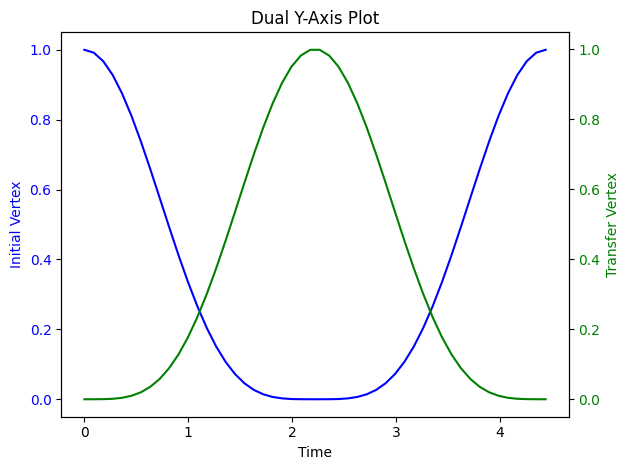

In [24]:
def select_elements(list_of_lists, index):
    """
    Select elements at the specified index from a list of lists.
    
    Parameters:
        list_of_lists: A list containing inner lists.
        index: Index of the elements to be selected from each inner list.
        
    Returns:
        A list of the selected elements.
    """
    selected_elements = []
    for inner_list in list_of_lists:
        try:
            selected_elements.append(round(inner_list[index],4))
        except IndexError:
            print(f"Index {index} is out of bounds for an inner list.")
    
    return selected_elements
def plot_dual_y_axis(time_list, first_half_values, second_half_values):
    """
    Plots a graph with a shared x-axis (time) and two y-axes.
    
    Parameters:
        time_list: List of time points (shared x-axis).
        first_half_values: List of values for the first y-axis.
        second_half_values: List of values for the second y-axis.
    """
    
    # Create figure and axis objects
    fig, ax1 = plt.subplots()
    
    # Plotting data on the first y-axis
    ax1.plot(time_list, first_half_values, color="blue", label="First Half Values")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Initial Vertex", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    
    # Creating a second y-axis
    ax2 = ax1.twinx()
    
    # Plotting data on the second y-axis
    ax2.plot(time_list, second_half_values, color="green", label="Second Half Values")
    ax2.set_ylabel("Transfer Vertex", color="green")
    ax2.tick_params(axis="y", labelcolor="green")
    
    # Show the plot
    plt.title("Dual Y-Axis Plot")
    fig.tight_layout()
    plt.show()
    
time_list = t
print(time_list)
first_half_values = select_elements(qw1.getProbVecList(),0)
second_half_values = select_elements(qw1.getProbVecList(),2)
plot_dual_y_axis(time_list, first_half_values, second_half_values)

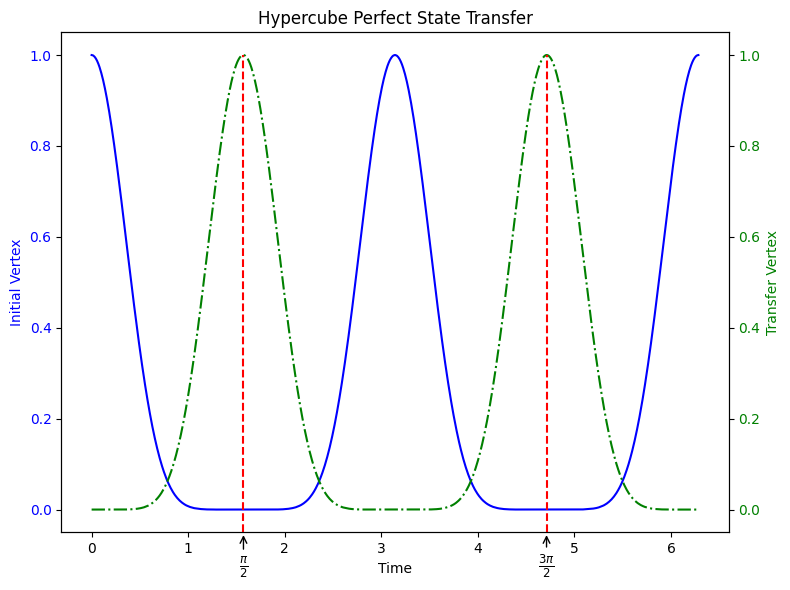

In [108]:
import matplotlib.pyplot as plt
import itertools

def plot_dual_y_axis(time_list, value_pairs, max_labels=None,save_filename=None,figsize=(10, 6)):
    """
    Plots a graph with a shared x-axis (time) and two y-axes for pairs of values.
    
    Parameters:
        time_list: List of time points (shared x-axis).
        value_pairs: List of tuples, each containing two lists of y-values.
    """
    
    # Create figure and axis objects
    fig, ax1 = plt.subplots(figsize=figsize)

    # Plotting data
    line_styles = ['-', '--', ':', '-.']
    
    for i, (first_half_values, second_half_values) in enumerate(value_pairs):
        # The first element in each pair will have a solid/dashed line style and be plotted on the first axis
        ax1.plot(time_list, first_half_values, color='blue', linestyle=line_styles[i%len(line_styles)], label=f"First Half Values {i+1}")
        # The second element in each pair will also have a solid/dashed line style but be plotted on the second axis
        ax2 = ax1.twinx()
        # ax2.plot(time_list, second_half_values, color='green', linestyle=line_styles[i%len(line_styles)], label=f"Second Half Values {i+1}")
        ax2.plot(time_list, second_half_values, color='green', linestyle='-.', label=f"Second Half Values {i+1}")
        ax2.set_ylabel(f"Transfer Vertex", color='green')
        ax2.tick_params(axis="y", labelcolor='green')
        # Find local maximum y-values and their corresponding x-values
        max_points = [(y, x) for x, y in zip(time_list, second_half_values)]
        max_points.sort(key=lambda p: p[0], reverse=True)  # Sort by y-value, highest first

        # Take the top N maximums, where N is the length of max_labels
        top_max_points = max_points[:len(max_labels)]

        # Calculate the range of y-values for the second axis
        ymin, ymax = ax2.get_ylim()

        for (max_y_value, max_x_value), label in zip(top_max_points, max_labels):
            # Calculate the normalized height of the maximum y-value
            normalized_max_y = (max_y_value - ymin) / (ymax - ymin)

            # Add a vertical line at the x-value where the maximum y-value occurs, but limit its height
            ax2.axvline(x=max_x_value, ymin=0, ymax=normalized_max_y, color='red', linestyle='--')

            # Add text annotation near the vertical line at the bottom
            ax1.annotate(label, xy=(max_x_value, ax1.get_ylim()[0]), xycoords='data',
                         xytext=(0, -28), textcoords='offset points',
                         arrowprops=dict(arrowstyle="->"),
                         horizontalalignment='center', fontsize=12)

    ax1.set_xlabel("Time")
    ax1.set_ylabel("Initial Vertex", color='blue')
    ax1.tick_params(axis="y", labelcolor='blue')

    # Adding legend
    # fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    
    # Show the plot
    plt.title("Hypercube Perfect State Transfer")
    fig.tight_layout()
    if save_filename:
        plt.savefig(save_filename)
    plt.show()

    
n1 = 3
graph1 = nx.path_graph(n1)
initcond1 = [0]
t1 = np.linspace(0,3*eval('0.707108562377582*np.pi'),1000)
qw1 = QWAK(graph=graph1)
qw1.runMultipleWalks(timeList = t1, initStateList = initcond1)

n2 = 4
graph2 = nx.hypercube_graph(n2)
initcond2 = [0]
t2 = np.linspace(0,4*eval('0.5*np.pi'),1000)
qw2 = QWAK(graph=graph2)
qw2.runMultipleWalks(timeList = t2, initStateList = initcond2)

init = initcond2[0]
target = 15


time_list = t2
value_pairs = [(select_elements(qw2.getProbVecList(),init),select_elements(qw2.getProbVecList(),target))]#,(select_elements(qw2.getProbVecList(),0),select_elements(qw2.getProbVecList(),3))]
# value_pairs = [(select_elements(qw1.getProbVecList(),0),select_elements(qw1.getProbVecList(),2))]

save_file = f'Output/PerfectStateTransfer/Hypercube_N{len(graph2)}_T{round(t2[-1],2)}_FROM{init}_TO{target}.png'
figsize = (8, 6)

plot_dual_y_axis(time_list, value_pairs,max_labels=[r"$\frac{\pi}{2}$",r"$\frac{3\pi}{2}$"],save_filename=save_file, figsize = figsize)